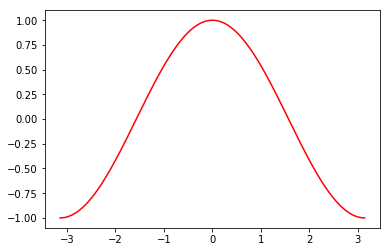

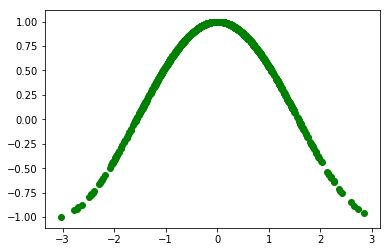

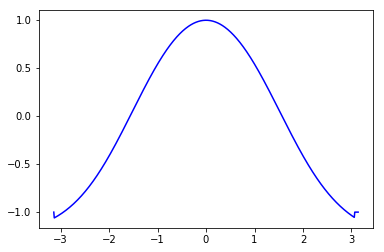

In [33]:
# -*- coding: utf-8 -*-
#Assignment_1
#Srinidhi Goud Myadaboyina
#Training on random normal noise then feeding the range of x to get the output
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 629, 1, 10, 1

# Create random Tensors to hold inputs and outputs, and wrap them in Variables.
x = (torch.randn(1000, D_in))
x=torch.fmod(x,math.pi)
y = Variable(torch.cos(x), requires_grad=False)
x=Variable(x)


# buf1=(torch.arange(-math.pi,math.pi,.01))
# x=buf1.view(629,1)
# y = Variable(torch.cos(x), requires_grad=False)
# x=Variable(x)

buf2=(torch.arange(-math.pi,math.pi,.01))
X=buf2.view(629,1)
Y = Variable(torch.cos(X), requires_grad=False)
X=Variable(X)
# print(X.shape)
Z_pred=torch.ones(629,1)*(-1)
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, D_out),
)
loss_fn = torch.nn.MSELoss(size_average=False)
plt.plot(X.data.numpy(), Y.data.numpy(), color="r")
plt.show()
plt.scatter(x.data.numpy(), y.data.numpy(), color="g")
plt.show()
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Variables it should update.
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(1,500000,10):
    s=t%619;
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x[s:s+10,])

    # Compute and print loss.
    loss = loss_fn(y_pred, y[s:s+10,])
    #print(t, loss.data[0])

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable weights
    # of the model)
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
for t in range(1,619,10):
    s=t%619;
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(X[s:s+10,])
    Z_pred[s:s+10,] = y_pred.data
    loss = loss_fn(y_pred, y[s:s+10,])
#     print(t, loss.data[0])

plt.plot(X.data.numpy(), Z_pred.numpy(), color="b")
plt.show()
